In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('https://www.stlouisfed.org/-/media/project/frbstl/stlouisfed/research/fred-md/monthly/current.csv?sc_lang=en&hash=80445D12401C59CF716410F3F7863B64')

# Clean the DataFrame by removing the row with transformation codes
df_cleaned = df.drop(index=0)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned['sasdate'] = pd.to_datetime(df_cleaned['sasdate'], format='%m/%d/%Y')
df_cleaned

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-01-01,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9616,23.3868,22.2620,31.6664,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
1,1959-02-01,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3917,23.7024,22.4549,31.8987,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
2,1959-03-01,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7142,23.8459,22.5651,31.8987,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
3,1959-04-01,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.1981,24.1903,22.8957,32.4019,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
4,1959-05-01,2642.720,2486.4,15.622,2.853072e+05,18679.66354,23.5476,24.3911,23.1161,32.5567,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.00,12646.00,80.7315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,2024-09-01,19993.464,16283.1,121.690,1.541305e+06,716388.00000,102.5873,100.4044,100.1100,102.0602,...,119.220,128.682,31.45,36.18,28.01,70.1,553347.06,934283.59,5368.5671,17.6597
789,2024-10-01,20067.376,16340.0,121.904,1.538666e+06,720393.00000,102.1219,99.6821,99.0178,101.4336,...,119.218,129.176,31.53,36.27,28.07,70.5,554951.25,938525.34,5407.2449,19.9478
790,2024-11-01,20111.246,16385.1,122.435,1.544822e+06,725079.00000,101.9736,99.5645,99.0025,101.0038,...,119.230,129.390,31.59,36.26,28.22,71.8,556075.09,941204.79,5382.5669,15.9822
791,2024-12-01,20136.069,16407.9,123.103,1.555153e+06,730300.00000,102.9833,100.2940,99.6550,101.3436,...,119.746,129.875,31.73,36.46,28.33,74.0,558854.68,946489.00,5370.9871,15.6997


In [2]:
# Extract transformation codes
transformation_codes = df.iloc[0, 1:].to_frame().reset_index()
transformation_codes.columns = ['Series', 'Transformation_Code']
import numpy as np

# Function to apply transformations based on the transformation code
def apply_transformation(series, code):
    if code == 1:
        # No transformation
        return series
    elif code == 2:
        # First difference
        return series.diff()
    elif code == 3:
        # Second difference
        return series.diff().diff()
    elif code == 4:
        # Log
        return np.log(series)
    elif code == 5:
        # First difference of log
        return np.log(series).diff()
    elif code == 6:
        # Second difference of log
        return np.log(series).diff().diff()
    elif code == 7:
        # Delta (x_t/x_{t-1} - 1)
        return series.pct_change()
    else:
        raise ValueError("Invalid transformation code")

# Applying the transformations to each column in df_cleaned based on transformation_codes
for series_name, code in transformation_codes.values:
    df_cleaned[series_name] = apply_transformation(df_cleaned[series_name].astype(float), float(code))


df_cleaned = df_cleaned[2:]
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-03-01,0.006457,0.007325,0.009404,-0.003374,0.008321,0.014300,0.006036,0.004896,0.000000,...,-0.001148,0.000292,-0.000022,-0.008147,0.004819,NaN,0.004929,0.004138,-0.014792,NaN
1,1959-04-01,0.006510,0.007029,-0.003622,0.019915,0.000616,0.021080,0.014339,0.014545,0.015652,...,0.001312,0.001760,-0.000022,0.012203,-0.004890,NaN,0.012134,0.006734,0.024929,NaN
2,1959-05-01,0.005796,0.006618,0.012043,0.006839,0.007803,0.014954,0.008267,0.009580,0.004766,...,-0.001695,-0.001867,-0.000021,-0.004090,-0.004819,NaN,0.002828,0.002020,-0.015342,NaN
3,1959-06-01,0.003068,0.003012,0.003642,-0.000097,0.009064,0.001137,0.007035,0.007125,-0.004766,...,0.003334,0.001946,-0.004619,0.003992,0.004796,NaN,0.009726,0.009007,-0.012252,NaN
4,1959-07-01,-0.000580,-0.000762,-0.003386,0.012155,-0.000330,-0.024237,0.001168,0.008251,0.013056,...,-0.001204,-0.000013,0.000000,-0.004040,-0.004796,NaN,-0.004631,-0.001000,0.029341,NaN


In [10]:
import numpy as np
import pandas as pd
from scipy.linalg import solve  # No longer used, but kept for reference

def calculate_forecast(df_cleaned, p=4, H=[1, 4, 8], end_date='12/01/1999', target='INDPRO', xvars=['CPIAUCSL', 'TB3MS']):

    # Subset df_cleaned to use only data up to end_date
    rt_df = df_cleaned[df_cleaned['sasdate'] <= pd.Timestamp(end_date)]

    # Get the actual values of the target for different steps ahead
    Y_actual = []
    for h in H:
        os = pd.Timestamp(end_date) + pd.DateOffset(months=h)
        actual = df_cleaned[df_cleaned['sasdate'] == os][target] * 100  # Scale to match original code
        Y_actual.append(actual.values if not actual.empty else np.array([np.nan]))  # Handle missing values

    Yraw = rt_df[target]
    Xraw = rt_df[xvars]

    # Build the design matrix X
    X = pd.DataFrame()
    for lag in range(0, p):
        X[f'{target}_lag{lag}'] = Yraw.shift(lag)
    for col in Xraw.columns:
        for lag in range(0, p):
            X[f'{col}_lag{lag}'] = Xraw[col].shift(lag)

    # Add a column of ones for the intercept
    X.insert(0, 'Ones', np.ones(len(X)))

    # Save last row of X (converted to numpy) for forecasting at T+H
    X_T = X.iloc[-1:].values

    # Forecasts for each horizon h
    Yhat = []
    for h in H:
        y_h = Yraw.shift(-h)
        y = y_h.iloc[p:-h].values
        X_ = X.iloc[p:-h].values

        # Use the pseudo-inverse to solve for beta to handle singular matrices
        beta_ols = np.linalg.pinv(X_.T @ X_) @ (X_.T @ y)

        # Produce the forecast and scale as needed
        forecast = X_T @ beta_ols * 100
        Yhat.append(forecast if forecast.size > 0 else np.array([np.nan]))  # Handle missing forecasts

    # Compute forecast errors (actual - forecast)
    errors = np.array(Y_actual) - np.array(Yhat)

    return errors, np.array(Y_actual), np.array(Yhat)


Using data up to 2000-01-01 00:00:00
Using data up to 2000-02-01 00:00:00
Using data up to 2000-03-01 00:00:00
Using data up to 2000-04-01 00:00:00
Using data up to 2000-05-01 00:00:00
Using data up to 2000-06-01 00:00:00
Using data up to 2000-07-01 00:00:00
Using data up to 2000-08-01 00:00:00
Using data up to 2000-09-01 00:00:00
Using data up to 2000-10-01 00:00:00
RMSFE:
 T+1     37.031082
T+4    136.396029
T+8    346.239066
dtype: float64


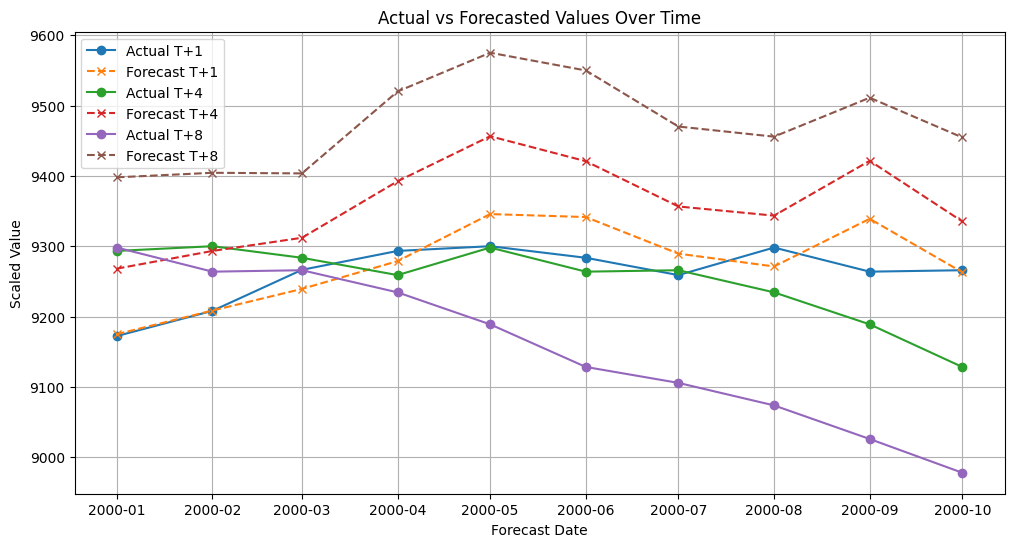

In [14]:
t0 = pd.Timestamp('12/1/1999')

e = []
T = []
Y_actual_all = []
Yhat_all = []

# Perform rolling forecast evaluation
for j in range(10):
    t0 = t0 + pd.DateOffset(months=1)
    print(f'Using data up to {t0}')

    # Run forecasting function
    ehat, Y_actual, Yhat = calculate_forecast(df_cleaned, p=4, H=[1,4,8], end_date=t0)

    # Store results
    e.append(ehat.flatten())
    T.append(t0)
    Y_actual_all.append(Y_actual.flatten())
    Yhat_all.append(Yhat.flatten())

# Convert results to Pandas DataFrames
edf = pd.DataFrame(e, index=T, columns=[f'T+{h}' for h in [1, 4, 8]])
Ydf_actual = pd.DataFrame(Y_actual_all, index=T, columns=[f'T+{h}' for h in [1, 4, 8]])
Ydf_hat = pd.DataFrame(Yhat_all, index=T, columns=[f'T+{h}' for h in [1, 4, 8]])

# Calculate RMSFE (square root of MSFE)
rmsfe = np.sqrt(edf.apply(np.square).mean())
print("RMSFE:\n", rmsfe)

# PLOTTING
plt.figure(figsize=(12, 6))

# Plot actual vs. forecasted values for different horizons
for h in [1, 4, 8]:
    plt.plot(Ydf_actual.index, Ydf_actual[f'T+{h}'], label=f'Actual T+{h}', marker='o')
    plt.plot(Ydf_hat.index, Ydf_hat[f'T+{h}'], label=f'Forecast T+{h}', linestyle='dashed', marker='x')

plt.title("Actual vs Forecasted Values Over Time")
plt.xlabel("Forecast Date")
plt.ylabel("Scaled Value")
plt.legend()
plt.grid(True)
plt.show()
